In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import cufflinks as cf
from pandasql import sqldf
import plotly.express as px
import plotly.graph_objects as go

In [2]:
cf.go_offline
%matplotlib inline

In [3]:
expenses=pd.read_csv('expenses.csv')

### EDA

In [4]:
expenses.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
expenses.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [7]:
expenses.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

<AxesSubplot:>

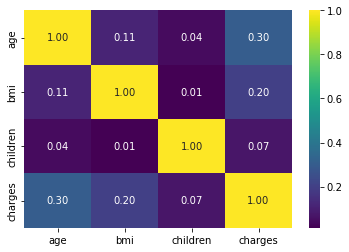

In [8]:
sns.heatmap(expenses.corr(),cmap='viridis',fmt='.2f',annot=True)

bmi and age have strong  correlation with charges

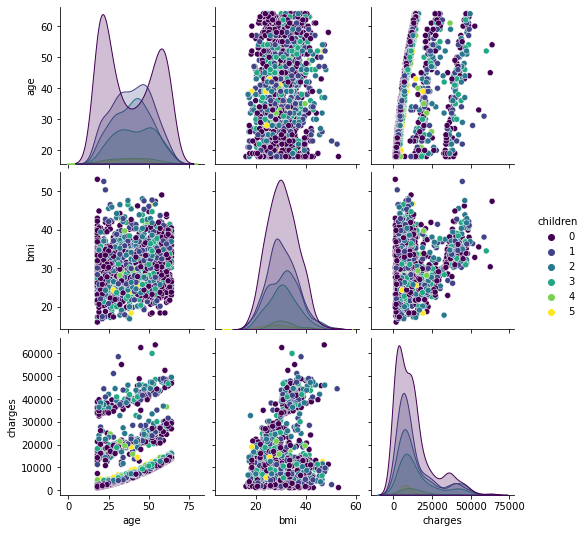

In [9]:
fig1=sns.pairplot(expenses,hue='children',palette='viridis')


<AxesSubplot:>

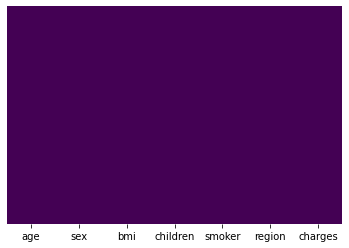

In [10]:
sns.heatmap(expenses.isna(),yticklabels=False,cbar=False,cmap='viridis')

there are no null values

In [11]:
px.bar(expenses.sex.value_counts(),labels=['M','F'])

In [12]:
px.pie(expenses,'sex',labels=['M','F'])

The pie shows the percentage of value counts of sex

In [13]:
px.scatter(expenses,x='age',y='charges',color='smoker')

Older people tend to spend more on medical bill , being a smoker also affects the charges in that smokers are most likely to spend more irrespective of their age.

In [14]:
px.scatter(expenses,x='bmi',y='charges',color='smoker')

In [15]:
fig2=px.scatter(expenses,x='bmi',y='charges',size='charges',color='region',size_max=30)

fig2.show()

BMI between 30-40 seems to have the highest concentration and in turn the highest charges.
Southeast also has the highest charges.

##### Could southest have the highest number of smokers?

In [16]:
px.histogram(data_frame=expenses,x=expenses.region,color='smoker')



There are more non smokers per region than smokers. With southeast having the larges count and also slightly the highest number of smokers, it is not surprising that southeast region has the highest amount of charges.

In [17]:
expenses.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

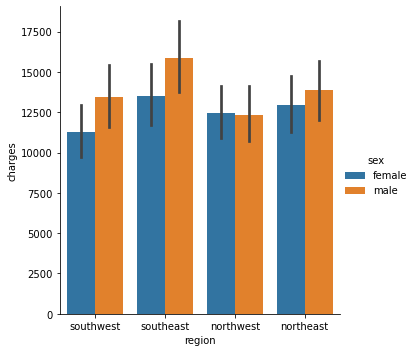

In [18]:
sns.catplot(data=expenses,x='region',y='charges',kind='bar',hue='sex')

Males paid more in all regions except the northwest region.

#### BMI Category: Classify BMI based on the widely accepted BMI classification groups.

In [19]:
bmicat=[]
for row in expenses['bmi']:
    if row < 18.5 : bmicat.append('Underweight')
    elif row <=24.9: bmicat.append('Healthy')
    elif row <= 29.9: bmicat.append('Overweight')
    elif row >= 30 : bmicat.append('Obese')
    else: bmicat.append('Not Rated')

In [20]:
expenses['bmi_cat']=bmicat

In [21]:
expenses

age     sex     bmi  children smoker     region      charges     bmi_cat
0      19  female  27.900         0    yes  southwest  16884.92400  Overweight
1      18    male  33.770         1     no  southeast   1725.55230       Obese
2      28    male  33.000         3     no  southeast   4449.46200       Obese
3      33    male  22.705         0     no  northwest  21984.47061     Healthy
4      32    male  28.880         0     no  northwest   3866.85520  Overweight
...   ...     ...     ...       ...    ...        ...          ...         ...
1333   50    male  30.970         3     no  northwest  10600.54830       Obese
1334   18  female  31.920         0     no  northeast   2205.98080       Obese
1335   18  female  36.850         0     no  southeast   1629.83350       Obese
1336   21  female  25.800         0     no  southwest   2007.94500  Overweight
1337   61  female  29.070         0    yes  northwest  29141.36030  Overweight

[1338 rows x 8 columns]

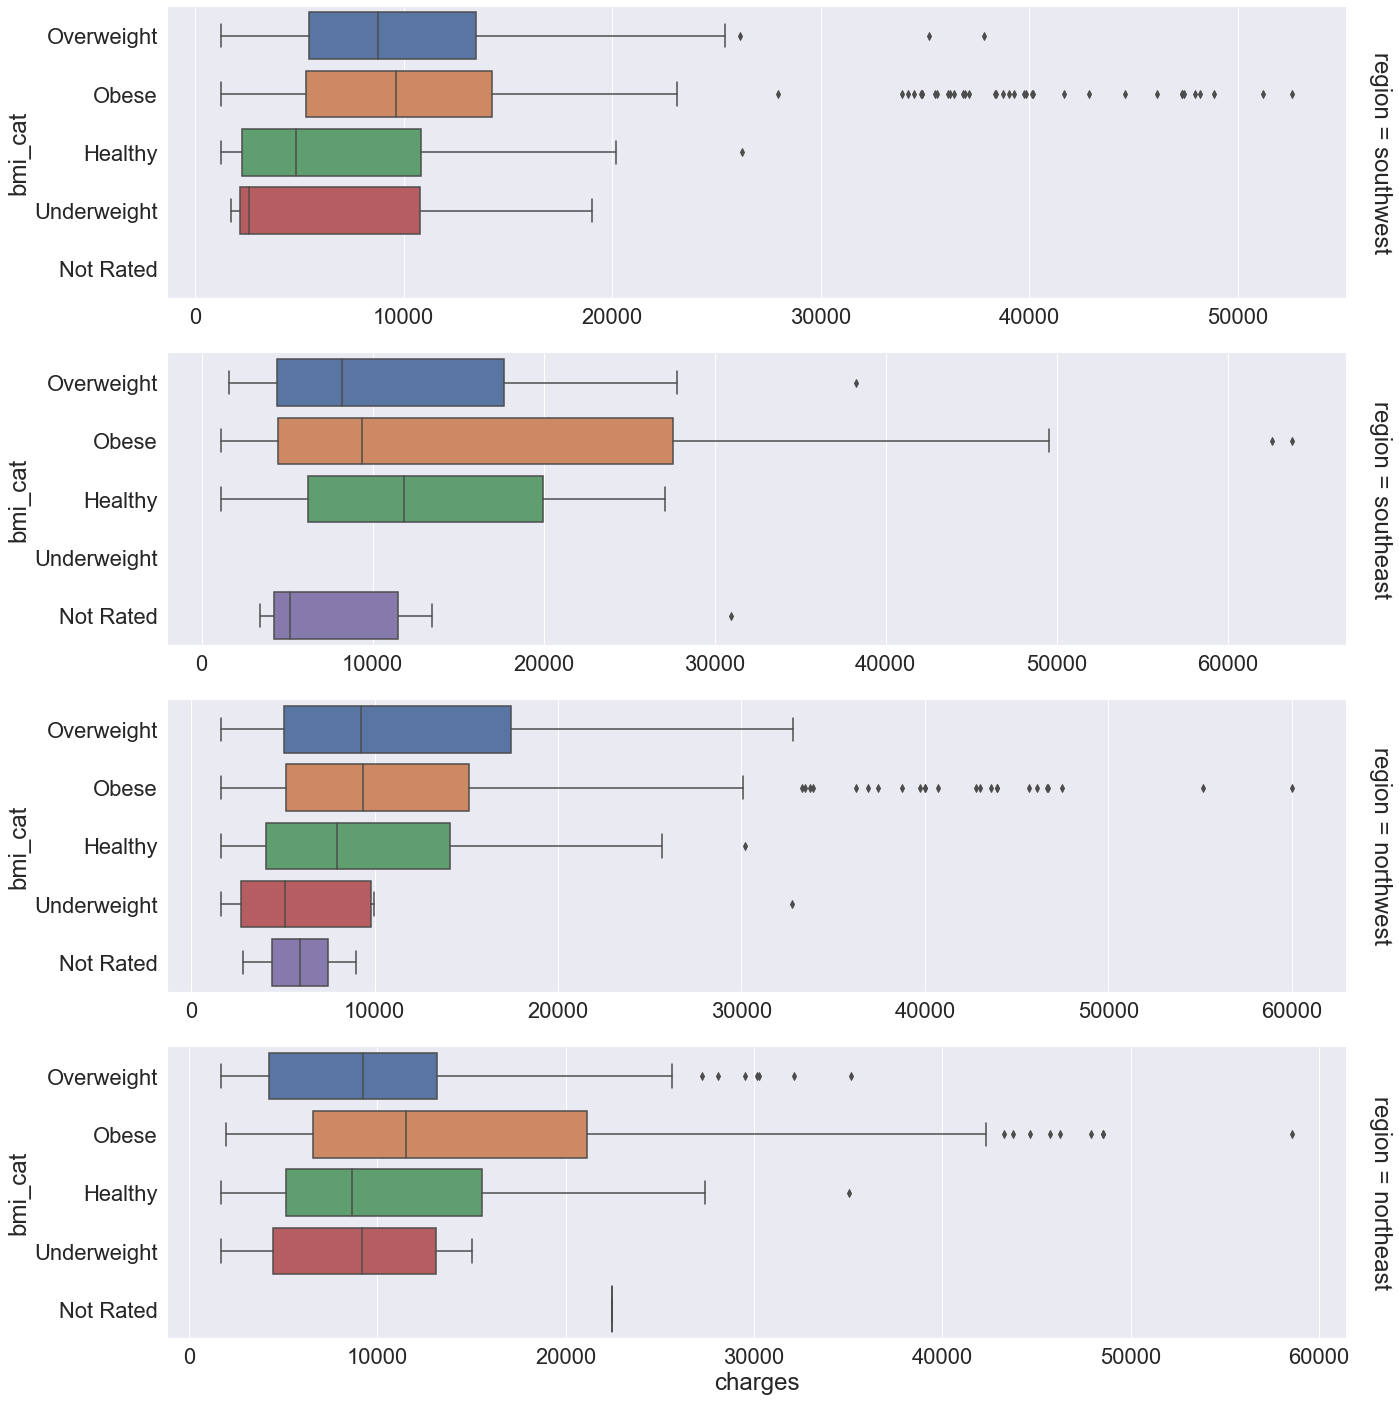

In [38]:
bmifig=sns.catplot(
        data=expenses,x='charges',y='bmi_cat',row='region',kind='box',orient='h',
        sharex=False,margin_titles=True,height=5,aspect=4)
sns.set(font_scale=2)

In [22]:
expenses.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Convert the values of sex,smoker,region to numeric representations 

In [23]:
expenses['sex']=expenses['sex'].map({'female':0,'male':1})
expenses['smoker']=expenses['smoker'].map({'no':0,'yes':1})
expenses['region']=expenses['region'].map({'northeast':1,'northwest':2,'southeast':3,'southwest':3})

In [24]:
expenses.head()

age  sex     bmi  children  smoker  region      charges     bmi_cat
0   19    0  27.900         0       1       3  16884.92400  Overweight
1   18    1  33.770         1       0       3   1725.55230       Obese
2   28    1  33.000         3       0       3   4449.46200       Obese
3   33    1  22.705         0       0       2  21984.47061     Healthy
4   32    1  28.880         0       0       2   3866.85520  Overweight

In [25]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
 7   bmi_cat   1338 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 83.8+ KB


In [26]:
expenses.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      2.272795  13270.422265  
std       0.826555  12110.011237  
min       1.000000   1121.873900  
25%       2.000000   4740.287150  
50%       3.000000   9382.033000  
75%       3.000000  16639.912515  
max       3.000000  63770.428010

<AxesSubplot:>

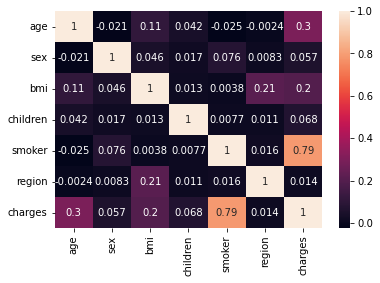

In [27]:
sns.heatmap(expenses.corr(),annot=True)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.


In [28]:
expenses.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_cat'],
      dtype='object')

In [40]:
##features: drop the "charges" column
X=expenses.drop(columns=['charges','bmi_cat'],axis=1)

In [41]:
y=expenses['charges']

**The  model_selection.train_test_split from sklearn will be used to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Training the Model

Now its time to train our model on our training data!


**Create an instance of a LinearRegression() model lm.

In [43]:
lm=LinearRegression()

In [44]:
#fit data
lm.fit(X_train,y_train)

LinearRegression()

In [45]:
print(lm.coef_)

[  259.48412325    95.03699376   342.47629435   472.26289487
 23214.02649266  -412.37559789]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [46]:
prediction=lm.predict(X_test)

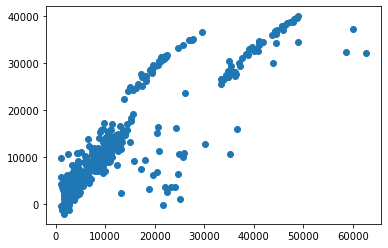

In [47]:
plt.scatter(y_test,prediction)

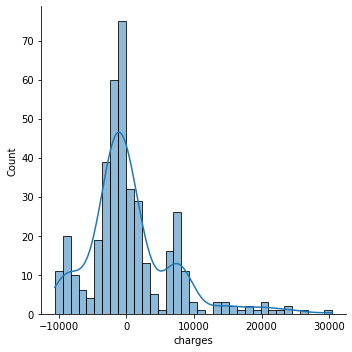

In [48]:
sns.displot((y_test-prediction),kde=True)

In [49]:
from sklearn import metrics

In [50]:
mas=metrics.mean_absolute_error(y_test,prediction)
mse=metrics.mean_absolute_error(y_test,prediction)
rmse=np.sqrt(mse)

print("MAS: " ,mas)
print("MSE: ",mse)
print("R2: ",rmse)

MAS:  4354.867681310297
MSE:  4354.867681310297
R2:  65.99142127057347


## Conclusion